In [ ]:
# Install Git if not already installed
!apt-get install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
# Clone the repository
!git clone https://github.com/GreenAvo-Capstone/Machine-Learning.git

Cloning into 'Machine-Learning'...
remote: Enumerating objects: 307, done.
remote: Counting objects: 100% (307/307), done.
remote: Compressing objects: 100% (299/299), done.
remote: Total 307 (delta 12), reused 254 (delta 1), pack-reused 0
Receiving objects: 100% (307/307), 15.31 MiB | 21.22 MiB/s, done.
Resolving deltas: 100% (12/12), done.


In [ ]:
# Change directory to the dataset directory
%cd Machine-Learning/dataset

/content/Machine-Learning/dataset/Machine-Learning/dataset


In [ ]:
# List files to verify the dataset is downloaded
!ls

HalfRipe  Raw  Ripe  test  train


In [ ]:
#Import necessary libraries
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

Cloning into 'Machine-Learning'...
remote: Enumerating objects: 307, done.
remote: Counting objects: 100% (307/307), done.
remote: Compressing objects: 100% (299/299), done.
remote: Total 307 (delta 12), reused 254 (delta 1), pack-reused 0
Receiving objects: 100% (307/307), 15.31 MiB | 27.51 MiB/s, done.
Resolving deltas: 100% (12/12), done.
Image Dimensions:  (960, 768)


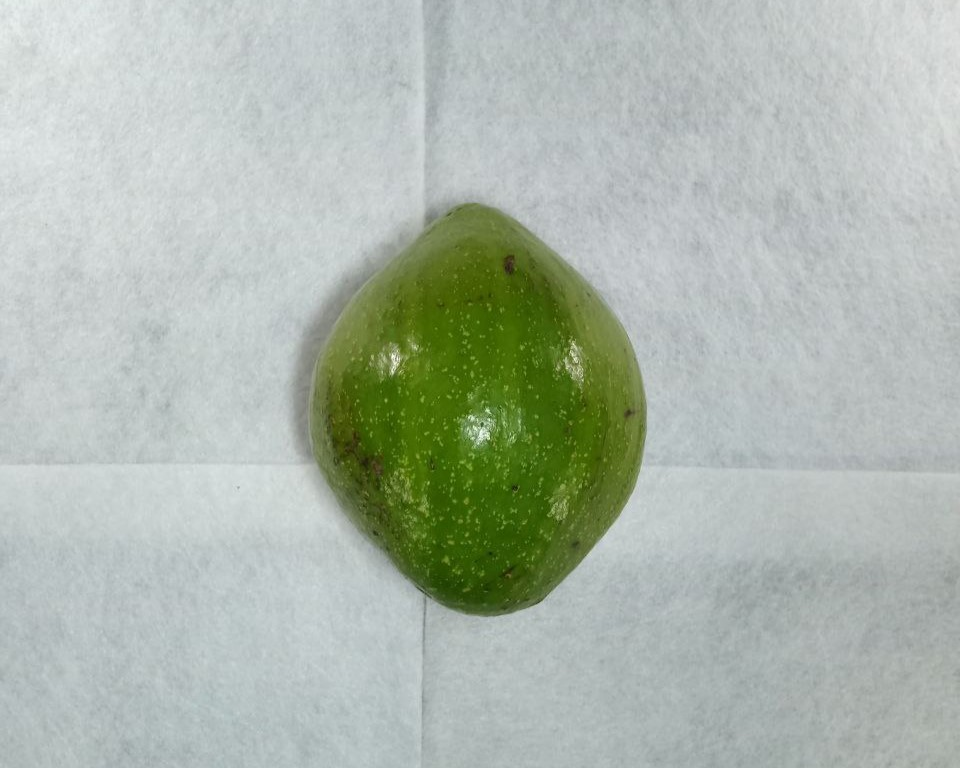

In [ ]:
from PIL import Image
import os

# Clone the repository (jika belum dilakukan sebelumnya)
!git clone https://github.com/GreenAvo-Capstone/Machine-Learning.git

# Path ke direktori dataset
pth = 'Machine-Learning/dataset/'

# raw avocado
Raw_image_path = os.path.join(pth, 'Raw/Alpukat_buah1 (1).jpg')
Raw_image = Image.open(Raw_image_path)
print("Image Dimensions: ", Raw_image.size)
Raw_image


Image Dimensions:  (960, 768)


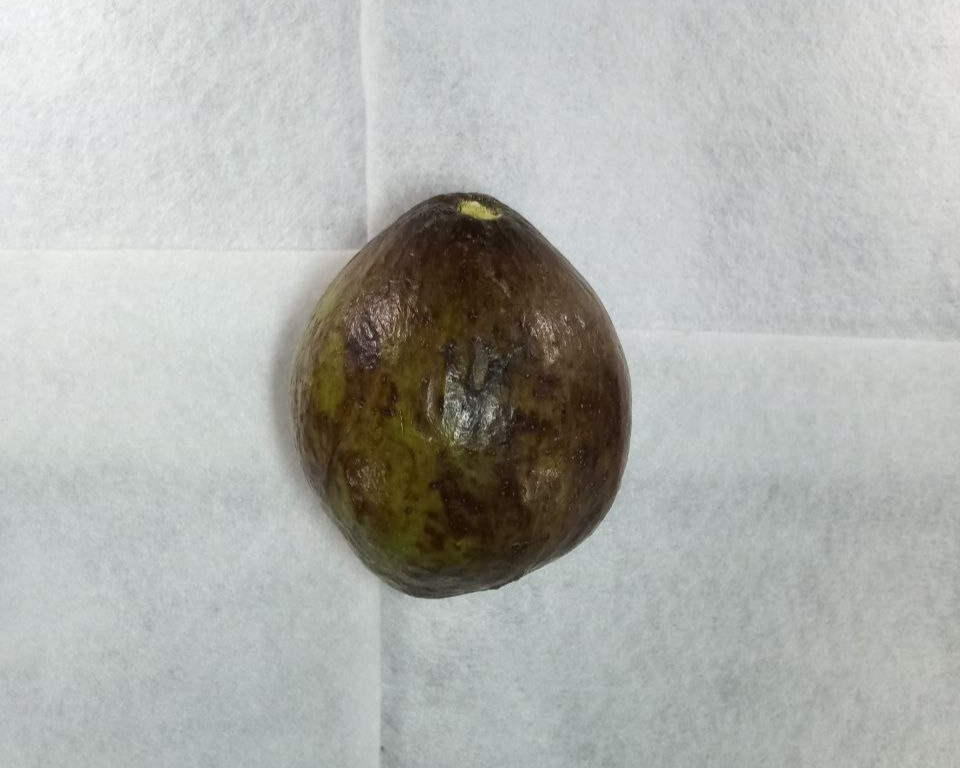

In [ ]:
# half-ripe
HalfRipe_image_path = pth+'HalfRipe/Alpukat_buah1 (1).jpg'
HalfRipe_image = Image.open(HalfRipe_image_path)
print("Image Dimensions: ", HalfRipe_image.size)
HalfRipe_image

Image Dimensions:  (960, 768)


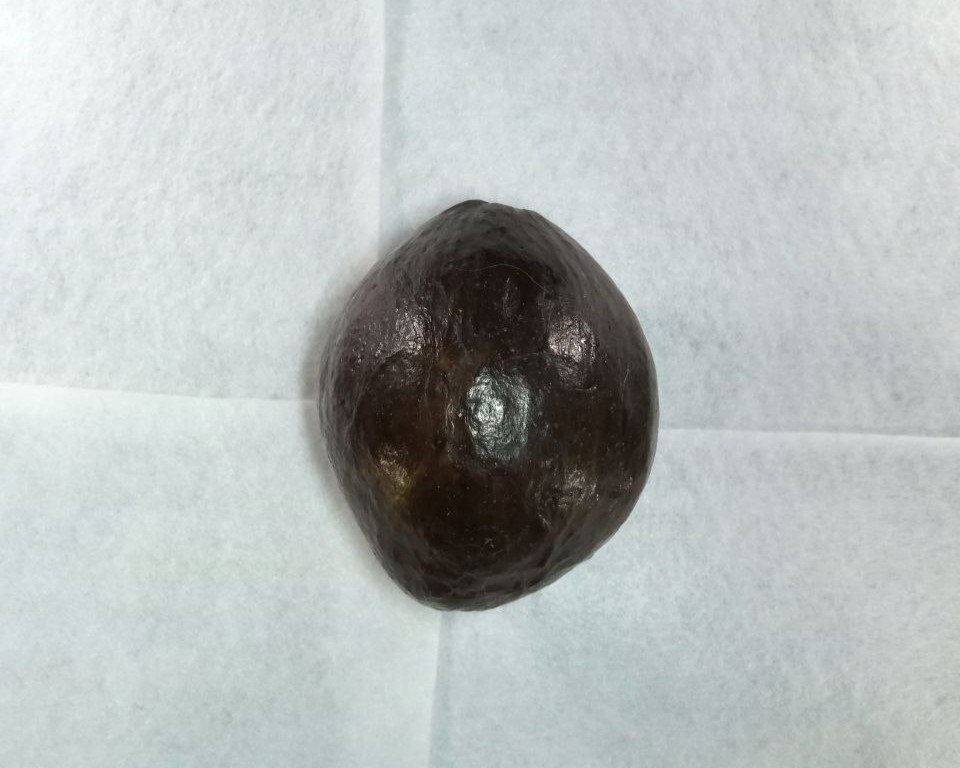

In [ ]:
# Ripe avocado
Ripe_image_path = pth+'Ripe/Alpukat_buah1 (1).jpg'
Ripe_image = Image.open(Ripe_image_path)
print("Image Dimensions: ", Ripe_image.size)
Ripe_image

In [ ]:
# Set up data directories
import shutil
import random

# Define the paths for the data folders
raw_folder = 'Machine-Learning/dataset/Raw/'
halfripe_folder = 'Machine-Learning/dataset/HalfRipe/'
Ripe_folder = 'Machine-Learning/dataset/Ripe/'

# Define the paths for the train and test data folders
train_folder = 'Machine-Learning/dataset/train/'
test_folder = 'Machine-Learning/dataset/test/'

# Check if train and test folders already exist
train_exists = os.path.exists(train_folder)
test_exists = os.path.exists(test_folder)

# If train and test folders don't exist, split the dataset
if not (train_exists and test_exists):
    # Create the train and test data folders
    os.makedirs(train_folder + 'Raw/', exist_ok=True)
    os.makedirs(train_folder + 'HalfRipe/', exist_ok=True)
    os.makedirs(train_folder + 'Ripe/', exist_ok=True)
    os.makedirs(test_folder + 'Raw/', exist_ok=True)
    os.makedirs(test_folder + 'HalfRipe/', exist_ok=True)
    os.makedirs(test_folder + 'Ripe/', exist_ok=True)

    # Function to split the dataset
    def split_dataset(source_folder, train_folder, test_folder, split_ratio):
        images = os.listdir(source_folder)
        random.shuffle(images)
        split_index = int(len(images) * split_ratio)

        # Move images to the train folder
        for image in images[:split_index]:
            src = os.path.join(source_folder, image)
            dest = os.path.join(train_folder, image)
            shutil.copyfile(src, dest)
            print("Moved", image, "to train folder")

        # Move images to the test folder
        for image in images[split_index:]:
            src = os.path.join(source_folder, image)
            dest = os.path.join(test_folder, image)
            shutil.copyfile(src, dest)
            print("Moved", image, "to test folder")

    # Split the raw dataset
    split_ratio = 0.8
    split_dataset(raw_folder, train_folder + 'Raw/', test_folder + 'Raw/', split_ratio)

    # Split the half-ripe dataset
    split_dataset(halfripe_folder, train_folder + 'HalfRipe/', test_folder + 'HalfRipe/', split_ratio)

    # Split the ripe dataset
    split_dataset(Ripe_folder, train_folder + 'Ripe/', test_folder + 'Ripe/', split_ratio)

    print("Dataset successfully split into train and test data.")
else:
    print("Train and test data folders already exist. Skipping data splitting.")

Train and test data folders already exist. Skipping data splitting.


In [ ]:
train_dir = pth+"train"
test_dir = pth+"test"

In [ ]:
# Define image size and batch size
img_size = (224, 224)
batch_size = 32

In [ ]:
# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Load data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical')

Found 96 images belonging to 3 classes.
Found 24 images belonging to 3 classes.


In [ ]:
# Define the number of classes
num_classes = len(train_generator.class_indices)
print(num_classes)

3


In [ ]:
# Create the base model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

In [ ]:
# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Unfreeze some layers of the base model for fine-tuning
for layer in base_model.layers[-10:]:
    layer.trainable = True

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Define callbacks
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, mode='max', restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=3, verbose=1, mode='max', min_lr=1e-6)

In [ ]:
# Train the model
steps_per_epoch = max(1, train_generator.samples // batch_size)
validation_steps = max(1, test_generator.samples // batch_size)
epochs = 100

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=test_generator,
    validation_steps=validation_steps,
    epochs=epochs,
    callbacks=[checkpoint]
)

Epoch 1/100
3/3 [==============================] - ETA: 0s - loss: 1.3097 - accuracy: 0.2917 
Epoch 1: val_accuracy improved from -inf to 0.33333, saving model to best_model.h5
3/3 [==============================] - 92s 13s/step - loss: 1.3097 - accuracy: 0.2917 - val_loss: 1.1297 - val_accuracy: 0.3333
Epoch 2/100
3/3 [==============================] - ETA: 0s - loss: 1.0642 - accuracy: 0.3854
Epoch 2: val_accuracy did not improve from 0.33333
3/3 [==============================] - 29s 10s/step - loss: 1.0642 - accuracy: 0.3854 - val_loss: 1.0870 - val_accuracy: 0.3333
Epoch 3/100
3/3 [==============================] - ETA: 0s - loss: 1.0299 - accuracy: 0.4062
Epoch 3: val_accuracy did not improve from 0.33333
3/3 [==============================] - 34s 12s/step - loss: 1.0299 - accuracy: 0.4062 - val_loss: 1.0731 - val_accuracy: 0.3333
Epoch 4/100
3/3 [==============================] - ETA: 0s - loss: 1.0151 - accuracy: 0.5104
Epoch 4: val_accuracy improved from 0.33333 to 0.54167, sa

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

In [ ]:
# Save the model
model.save('avocado_model.h5')

In [ ]:
# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [ ]:
# Save the TensorFlow Lite model
with open('avocado_model.tflite', 'wb') as f:
    f.write(tflite_model)